In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('opencv.png')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgray = 255-imgray

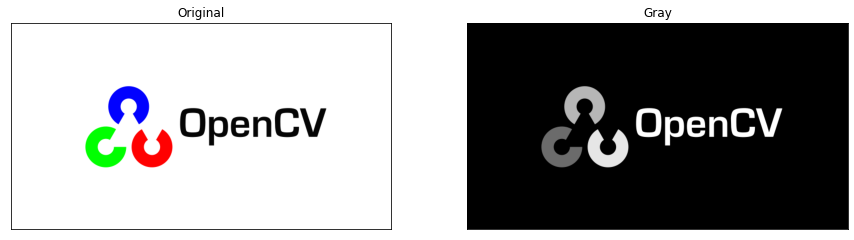

In [3]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Gray'), plt.xticks([]), plt.yticks([])
plt.show()


In [5]:
ret,thresh = cv2.threshold(imgray,8,255,cv2.THRESH_BINARY)


In [6]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [7]:
imgcontour = cv2.drawContours(img, contours, -1, (255,32,32), 2)
img = cv2.imread('opencv.png')

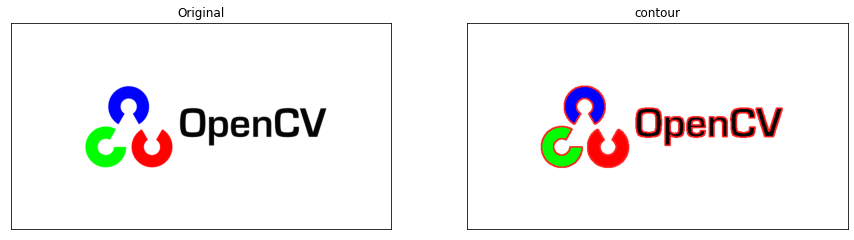

In [8]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgcontour,cmap = 'gray')
plt.title('contour'), plt.xticks([]), plt.yticks([])
plt.show()

In [9]:
cnt = contours[9]
epsilon = 0.001*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

In [10]:
imgcontour = cv2.imread('opencv.png')
imgcontour = cv2.drawContours(imgcontour, [cnt], -1, (255,32,255), 3)
imgapprox = cv2.imread('opencv.png')
imgapprox = cv2.drawContours(imgapprox, [approx], -1, (255,32,255), 3)
img = cv2.imread('opencv.png')

In [11]:
cnt.shape, approx.shape

((63, 1, 2), (63, 1, 2))

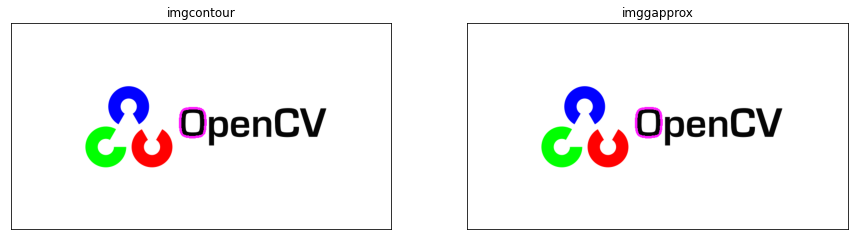

In [12]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgcontour)
plt.title('imgcontour'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgapprox,cmap = 'gray')
plt.title('imggapprox'), plt.xticks([]), plt.yticks([])
plt.show()

In [13]:
hull = cv2.convexHull(approx)

In [14]:
imghull = cv2.imread('opencv.png')
imghull = cv2.drawContours(imghull, [hull], -1, (255,32,255), 3)

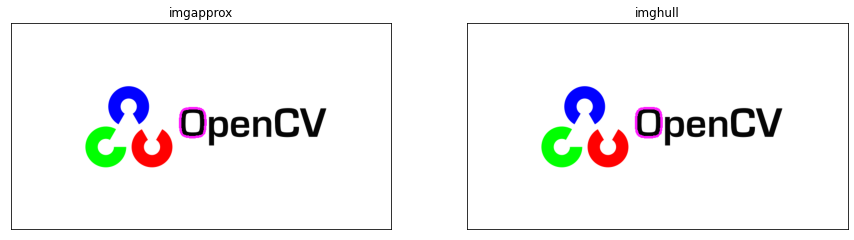

In [15]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imghull,cmap = 'gray')
plt.title('imghull'), plt.xticks([]), plt.yticks([])
plt.show()

In [16]:
x,y,w,h = cv2.boundingRect(cnt)
imgbox = cv2.imread('opencv.png')
imgbox = cv2.rectangle(imgbox,(x,y),(x+w,y+h),(255,0,0),2)

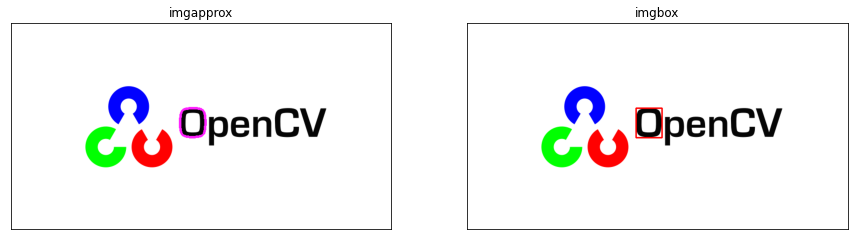

In [17]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgbox,cmap = 'gray')
plt.title('imgbox'), plt.xticks([]), plt.yticks([])
plt.show()

In [18]:
imgcontour = cv2.imread('opencv.png')
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
imgcontour = cv2.drawContours(imgcontour,[box],0,(0,0,255),2)

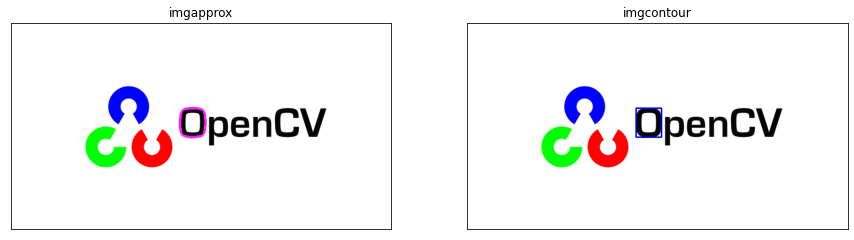

In [19]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgcontour,cmap = 'gray')
plt.title('imgcontour'), plt.xticks([]), plt.yticks([])
plt.show()

In [20]:
cnt = contours[9]
M = cv2.moments(cnt)
print(M)

{'m00': 2548.5, 'm10': 909438.6666666666, 'm01': 502987.6666666666, 'm20': 324992586.5833333, 'm11': 179490421.375, 'm02': 99870331.91666666, 'm30': 116300664562.3, 'm21': 64141105702.683334, 'm12': 35638184631.85, 'm03': 19946913705.8, 'mu20': 457099.65830117464, 'mu11': -1998.8420339524746, 'mu02': 597586.0587982088, 'mu30': 4241.9326171875, 'mu21': -7564.354905560613, 'mu12': -6740.356934517622, 'mu03': 2952.5394287109375, 'nu20': 0.0703787616263595, 'nu11': -0.0003077578914828239, 'nu02': 0.09200918447347418, 'nu30': 1.2937553856426683e-05, 'nu21': -2.3070675046390074e-05, 'nu12': -2.0557547401514098e-05, 'nu03': 9.005008169483278e-06}


In [21]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [22]:
area = cv2.contourArea(cnt)

In [23]:
perimeter = cv2.arcLength(cnt,True)

In [24]:
imginfo = cv2.imread('opencv.png')
imginfo = cv2.circle(imginfo,(cx,cy), 5, (0,0,255), -1)
font = cv2.FONT_HERSHEY_SIMPLEX
msg = "A"+str(area)+"L"+str(perimeter)
imginfo=cv2.putText(imginfo,msg,(cx,cy), font, 1,(32,32,32),2,cv2.LINE_AA)

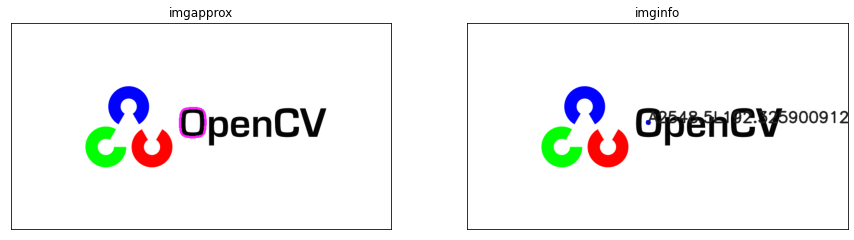

In [25]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imginfo,cmap = 'gray')
plt.title('imginfo'), plt.xticks([]), plt.yticks([])
plt.show()